In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Three of the main steps you'll often have to take are:


#### 1. Splitting the data into features (usually X) and labels (usually y).
#### 2. Splitting the data into training and testing sets (and possibly a validation set).
#### 3. Filling (also called imputing) or disregarding missing values.
#### 4. Converting non-numerical values to numerical values (also call feature encoding).

In [3]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [5]:
# 1. Make sure that the data is all numerical

car_sales = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [6]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [7]:
# Splitting the data

x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
# Turn the categories into variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(x)

pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [9]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [10]:
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

### Handling missing values in the data

In [11]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [12]:
# Create x and y

x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [13]:
# Turn the categories into variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(x)

# pd.DataFrame(transformed_x)

In [14]:
# The data still has missing values
# Onehotencoder was upgraded
# Still fill missing values

car_sales_missing["Make"].fillna("missing", inplace = True)

car_sales_missing["Colour"].fillna("missing", inplace = True)

car_sales_missing["Doors"].fillna(4, inplace = True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),
                                          inplace = True)


In [15]:
car_sales_missing.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [16]:
# Remove the rows with null values

car_sales_missing.dropna(inplace = True)

In [17]:
car_sales_missing.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [18]:
car_sales_missing.shape

(950, 5)

In [19]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [20]:
# Turn the categories into variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)

transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Fill missing values with Scikit learn ( IMPORTANT !!! )

In [21]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [22]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [23]:
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [24]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical features with "missing"
# Fill numerical features with mean

cat_imputer = SimpleImputer(strategy = "constant",
                            fill_value = "missing")

door_imputer = SimpleImputer(strategy = "constant",
                             fill_value = 4)

num_imputer = SimpleImputer(strategy = "mean")

# Define the cols to be worked upon

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Fills the missing data)

imputer = ColumnTransformer([
             ("cat_imputer", cat_imputer, cat_features),
             ("door_imputer", door_imputer, door_features),
             ("num_imputer", num_imputer, num_features) ])


#  Transform the data

filled_x_train = imputer.fit_transform(x_train)

filled_x_test = imputer.transform(x_test)


# Get our transformed data array's back into DataFrame's
filled_x_train_df = pd.DataFrame(filled_x_train,
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_x_test_df = pd.DataFrame(filled_x_test,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_x_train_df.isna().sum()


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [27]:
filled_x_train_df

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0
...,...,...,...,...
755,Nissan,Blue,4.0,111256.0
756,Honda,White,4.0,246079.0
757,Honda,Blue,4.0,224900.0
758,missing,White,3.0,19482.0


In [28]:
filled_x_test_df

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Red,4.0,133195.0
1,BMW,White,5.0,37513.0
2,Toyota,White,4.0,28809.0
3,Nissan,White,4.0,82429.0
4,Nissan,White,4.0,234161.0
...,...,...,...,...
185,missing,White,4.0,128072.0
186,Toyota,White,4.0,188338.0
187,Toyota,Red,4.0,241987.0
188,Honda,missing,4.0,150582.0


In [29]:
# Turn the categories into variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough",
                                   sparse_threshold = 0)


# Fill train and test values separately

transformed_x_train = transformer.fit_transform(filled_x_train_df)

transformed_x_test = transformer.fit_transform(filled_x_test_df)

In [30]:
transformed_x_train

array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 86696.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 20714.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 134415.0],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 224900.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 19482.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 199833.0]], dtype=object)

In [31]:
transformed_x_test

array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 133195.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 37513.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 28809.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 241987.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0],
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 129188.0]], dtype=object)

In [32]:
# Now we've transformed X, let's see if we can fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

0.09497633411335504

## Choosing the right model

Some things to note:

* Scikit-Learn refers to machine learning models and
algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
* Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
Regression problem - predicting a number (selling price of a car).
* Unsupervised problem (data with no labels) - clustering (grouping unlabelled samples with other similar unlabelled samples).

### Picking model for regression -> California housing dataset

In [33]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [34]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
# housing_df.drop("MedHouseVal", axis = 1, inplace = True)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
housing_df.shape

(20640, 9)

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_train, y_train)
   print(f"Model : {model} , Acuuracy : {scores}")


Model : LinearRegression() , Acuuracy : 0.6125511913966952
Model : Ridge() , Acuuracy : 0.6125511245209703
Model : Lasso() , Acuuracy : 0.29040715589885424
Model : DecisionTreeRegressor() , Acuuracy : 1.0
Model : RandomForestRegressor() , Acuuracy : 0.9736913566055061


### Picking model for classification -> Iris dataset

In [39]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
heart_disease.shape

(303, 14)

In [41]:
# Trying out linear SVC acc to the map

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LinearSVC(max_iter = 2000)

model.fit(x_train, y_train)

model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [42]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


models = {
    'Logistic Regression': LogisticRegression(max_iter = 200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_train, y_train)
   print(f"Model : {model} , Acuuracy : {scores}")

Model : LogisticRegression(max_iter=200) , Acuuracy : 0.8512396694214877
Model : DecisionTreeClassifier() , Acuuracy : 1.0
Model : RandomForestClassifier() , Acuuracy : 1.0


### A little tidbit for modelling in machine learning is:

* If you have structured data (tables, spreadsheets or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning (see the ZTM TensorFlow and PyTorch courses for more on deep learning).


## Ways to make predictions

In [44]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [46]:
clf.score(x_test, y_test)

0.8524590163934426

## Evaluate the model

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()
#### returns the probabilities of a classification label

In [48]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [49]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

### Using predict() for regression problems

In [50]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)

model.fit(x_train, y_train)

# model.score(x_test, y_test)

y_preds = model.predict(x_test)

In [52]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [53]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [54]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.3265721842781009

## Evaluating a model

Scikit-Learn implements 3 different methods of evaluating models.

* The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
* The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
* Problem-specific metric functions available in sklearn.metrics. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

### Evaluating using score method

In [55]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

In [56]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8066196804802649

### Evaluating using scoring parameter

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

In [58]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [59]:
# Scoring parameter set to none by default

cross_val_score(clf, x, y, cv = 5, scoring = None)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

### Evaluating a classification model
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

#### Accuracy

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

cross_val_score(clf, x, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [61]:
print(f"Heart Disease Classifier Accuracy: {clf.score(x_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


#### Area under ROC curve
* Receiver operating characteristic curve
* ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [62]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)

In [63]:
y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [64]:
y_probs_positives = y_probs[:, 1]
y_probs_positives[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positives)

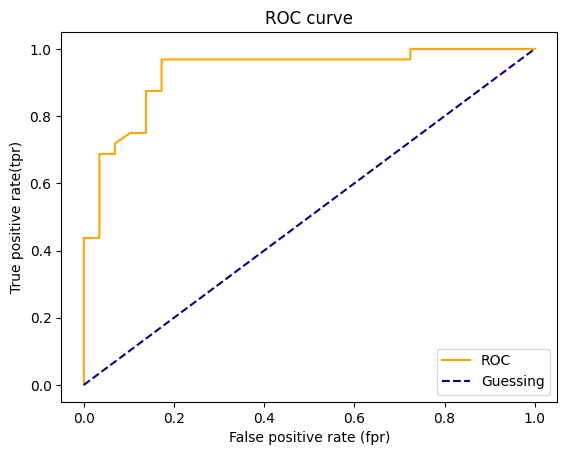

In [66]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
   """
   plots ROC curves
   """
   # Plot ROC curve
   plt.plot(fpr, tpr, color = "orange", label = "ROC")

   # Plot line with no predictive power (baseline)
   plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing")

   # customise the plot
   plt.xlabel("False positive rate (fpr)")
   plt.ylabel("True positive rate(tpr)")
   plt.title("ROC curve")
   plt.legend()
   plt.show()

plot_roc_curve(fpr, tpr)

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positives)

0.9304956896551724

#### Confusion matrix

* A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

* In essence, giving you an idea of where the model is getting confused.

In [68]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [69]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


<Axes: >

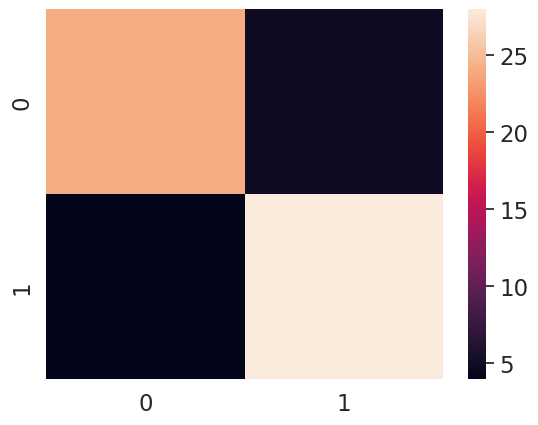

In [70]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

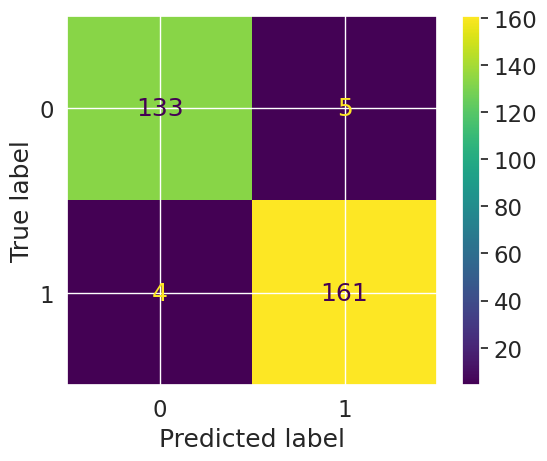

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x, y)

#### Classification Report

* A classification report is more so a collection of metrics rather than a single one.

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Evaluating a regression model

* R^2 (pronounced r-squared) or coefficient of determination - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.
* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better.
* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.


#### R squared error

In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8066196804802649

In [74]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

#### Mean Absolute error (MAE)

In [75]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mean_absolute_error(y_test, y_preds)

0.3265721842781009

#### Mean Squared error (MSE)

In [76]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)

0.2534073069137548

Classification functions

For:

* Accuracy we can use sklearn.metrics.accuracy_score
* Precision we can use sklearn.metrics.precision_score
* Recall we can use sklearn.metrics.recall_score
* F1 we can use sklearn.metrics.f1_score

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}%")
print(f"Recall: {recall_score(y_test, y_preds):.2f}%")
print(f"F1: {f1_score(y_test, y_preds):.2f}%")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85%
Recall: 0.88%
F1: 0.86%


We can use a similar setup for our regression problem, just with different methods.

For:

* R^2 we can use sklearn.metrics.r2_score
* MAE (mean absolute error) we can use sklearn.metrics.mean_absolute_error
* MSE (mean squared error) we can use sklearn.metrics.mean_squared_error

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators=100, n_jobs = -1)

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


## Improving a model

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.

* By hand
* Randomly with sklearn.model_selection.RandomizedSearchCV
* Exhaustively with sklearn.model_selection.GridSearchCV

#### Tuning by hand

In [80]:
def evaluate_preds(y_true, y_preds):
   accuracy = accuracy_score(y_true, y_preds)
   precision = precision_score(y_true, y_preds)
   recall = recall_score(y_true, y_preds)
   f1 = f1_score(y_true, y_preds)

   metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
   print(f"Accuracy: {accuracy * 100:.2f}%")
   print(f"Precision: {precision:.2f}")
   print(f"Recall: {recall:.2f}")
   print(f"F1 score: {f1:.2f}")
   return metric_dict

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 75.56%
Precision: 0.69
Recall: 0.86
F1 score: 0.77


In [82]:
# Tuning hyperparameter
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators = 100)
clf2.fit(x_train, y_train)

y_preds_2 = clf2.predict(x_valid)

clf2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 75.56%
Precision: 0.68
Recall: 0.90
F1 score: 0.78


#### Randomised Search CV

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = { "n_estimators" : [10, 100, 200, 300, 500, 1000],
         "max_depth" : [None, 5, 10, 20 , 30],
         "max_features" : ["auto", "sqrt"],
         "min_samples_split" : [2, 4, 6],
         "min_samples_leaf" : [1, 2, 4] }

np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = -1)
clf.fit(x_train, y_train)

# Setup the RandomisedSearchCV

rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 0)

rs_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 300, 500,
                                                         1000]})

In [84]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [85]:
# Make predictions with the best parameters

rs_y_preds = rs_clf.predict(x_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 75.41%
Precision: 0.81
Recall: 0.78
F1 score: 0.79


#### Grid Search CV

In [86]:
grid

{'n_estimators': [10, 100, 200, 300, 500, 1000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [87]:
grid_2 = {'n_estimators': [100, 200, 300],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2] }

In [88]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = -1)
clf.fit(x_train, y_train)

# Setup the GridSearchCV

gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid_2,
                      cv = 5,
                      verbose = 0)

gs_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 300]})

In [89]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 300}

In [90]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 77.05%
Precision: 0.83
Recall: 0.78
F1 score: 0.81


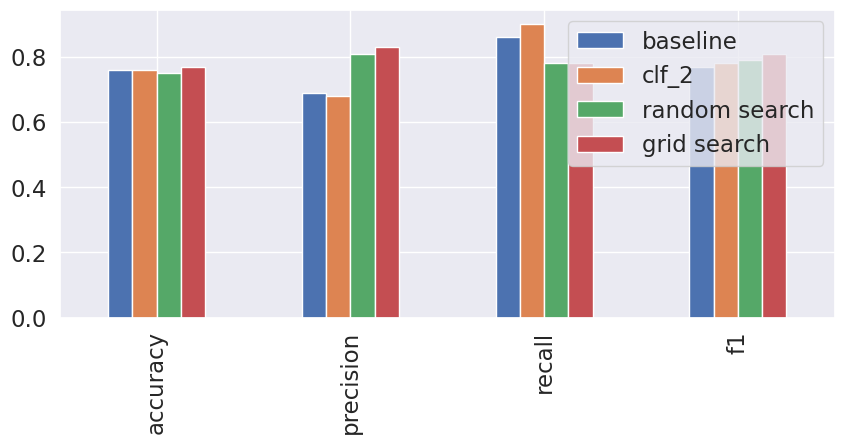

In [91]:
# Lets compare both metrics

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics} )

compare_metrics.plot.bar(figsize=(10, 4));

### Saving and loading a model

* We saw right at the start, one way to save a model is using Python's pickle module.

* We'll use pickle's dump() method and pass it our model, gs_clf, along with the open() function containing a string for the filename we want to save our model as, along with the "wb" string which stands for "write binary", which is the file type open() will write our model as.

In [92]:
import pickle

# Saving an existing model to a file

best_model = 'gs_clf_random_forest.pkl'
pickle.dump(gs_clf, open(best_model, "wb"))

In [94]:
# Loading a saved model

best_model_loaded = pickle.load(open(best_model, "rb"))

### Putting it all together !!!

In [95]:
data = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [96]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [97]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

We'll build a Pipeline to do so.

* Pipeline's main input parameter is steps which is a list of tuples ([(step_name, action_to_take)]) of the step name, plus the action you'd like it to perform.

In our case, you could think of the steps as:

* Fill missing data
* Convert data to numbers
* Build a model on the data

In [100]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

np.random.seed(42)


data.dropna(subset = ["Price"], inplace = True)


# Define different features and transformer pipelines

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer ", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("one_hot", OneHotEncoder(handle_unknown = "ignore")) ])


door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4)) ])


numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
])


# Setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
    transformers = [
        ("cat", categorical_transformer, categorical_features),
        ("doors", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features) ])


# Create a preprocessing and modelling pipeline

model = Pipeline(steps = [("preprocessor", preprocessor),
                          ("model", RandomForestRegressor())])


# Splitting the data into training and testing sets

x = data.drop("Price", axis = 1)
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


# Fit and score the model

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

### It's also possible to GridSearchCV or RandomizedSearchCV with a Pipeline.

In [101]:
# Using grid search with pipeline
from sklearn.model_selection import GridSearchCV

# note the double underscore after each prefix "preprocessor__"
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 0)
gs_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer ',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('doors',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

In [103]:
# Score the best model
gs_model.score(x_test, y_test)

0.2848784564026805